In [5]:
import os
import sys
sys.path.insert(0, "/home/mohan/Projects")
import numpy as np 
from matplotlib import pyplot as plt
from albatros_analysis.utils import baseband_utils as butils
from scio import scio
import subprocess
from albatros_analysis.orbcomm import generate_phases

In [6]:
path="/home/mohan/Projects/direct/16275/1627503459"
pol00=scio.read(os.path.join(path,'pol00.scio.bz2'))

crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings [258 300]
num of segments 3
boundaries [  0 258 300 560]
OFF
crossings [ 11 113 337 441]
num of segments 5
boundaries [  0  11 113 337 441 560]
OFF
crossings [ 56  92 406 417]
num of segments 5
boundaries [  0  56  92 406 417 560]
OFF
crossings [270 295]
num of segments 3
boundaries [  0 270 295 560]
OFF
crossings [62 70]
num of segments 3
boundaries [  0  62  70 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings [ 33  80 358 383]
num of segments 5
boundaries [  0  33  80 358 383 560]
OFF
crossings [ 12 114 337 443]
num of segments 5
boundaries [  0  12 114 337 443 560]
OFF
crossings []
num of segments 1
boundaries [  0 56

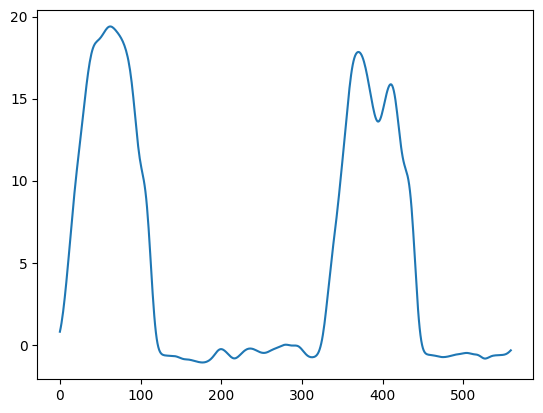

In [7]:
transits=generate_phases.find_single_sat_transits(pol00[:,1834:1854].copy())

In [8]:
transits

{0: [],
 1: [],
 2: [],
 3: [],
 4: [[258, 300]],
 5: [[11, 113], [337, 441]],
 6: [[56, 92], [406, 417]],
 7: [[270, 295]],
 8: [[62, 70]],
 9: [],
 10: [],
 11: [],
 12: [[33, 80], [358, 383]],
 13: [[12, 114], [337, 443]],
 14: [],
 15: [],
 16: [[194, 206]],
 17: [],
 18: [],
 19: []}

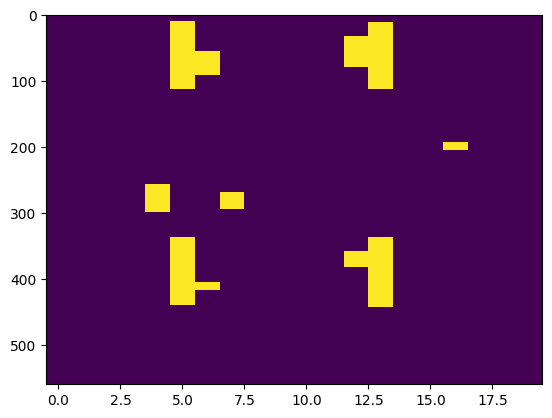

In [10]:
passes = np.zeros((pol00.shape[0],20),dtype=bool)
for c in range(0,20):
    for t in transits[c]:
        if t[1] - t[0] > 10:
            passes[t[0]:t[1],c] = 1
plt.imshow(passes,aspect='auto',interpolation='none')

In [26]:
x = np.arange(0,20,dtype=int).reshape(20,-1)
pwr = 2**(np.ones(560,dtype=int).reshape(560,1)@x.T)

In [27]:
pwr

array([[     1,      2,      4, ..., 131072, 262144, 524288],
       [     1,      2,      4, ..., 131072, 262144, 524288],
       [     1,      2,      4, ..., 131072, 262144, 524288],
       ...,
       [     1,      2,      4, ..., 131072, 262144, 524288],
       [     1,      2,      4, ..., 131072, 262144, 524288],
       [     1,      2,      4, ..., 131072, 262144, 524288]])

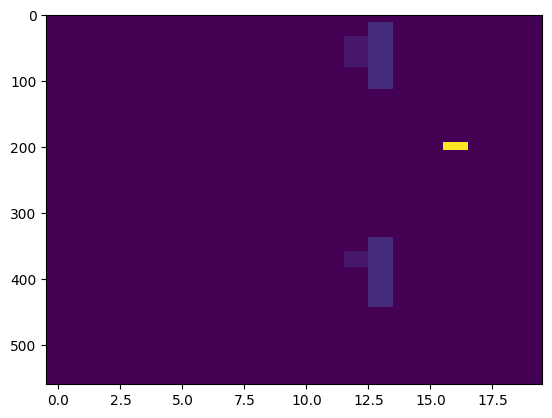

In [28]:
plt.imshow(passes*pwr,aspect='auto',interpolation='none')

In [30]:
np.log2(np.sum(passes*pwr,axis=1))

/tmp/ipykernel_53735/3828881982.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(np.sum(passes*pwr,axis=1))


array([       -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,  5.        , 13.00562455, 13.00562455, 13.00562455,
       13.00562455, 13.00562455, 13.00562455, 13.00562455, 13.00562455,
       13.00562455, 13.00562455, 13.00562455, 13.00562455, 13.00562455,
       13.00562455, 13.00562455, 13.00562455, 13.00562455, 13.00562455,
       13.00562455, 13.00562455, 13.00562455, 13.58871464, 13.58871464,
       13.58871464, 13.58871464, 13.58871464, 13.58871464, 13.58871464,
       13.58871464, 13.58871464, 13.58871464, 13.58871464, 13.58871464,
       13.58871464, 13.58871464, 13.58871464, 13.58871464, 13.58871464,
       13.58871464, 13.58871464, 13.58871464, 13.58871464, 13.58871464,
       13.58871464, 13.59618976, 13.59618976, 13.59618976, 13.59618976,
       13.59618976, 13.59618976, 13.59618976, 13.59618976, 13.59618976,
       13.59618976, 13.59618976, 13.59618976, 13.59618976, 13.59